<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/Image_Classification_Cat_Vs_Dog_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model will try to make the distinction between cat and dog images.

The dataset required will be downloaded from the kaggle during runtime.

Importing Dependencies

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
!git clone https://github.com/nikhil-xyz/ImageClassification.git

fatal: destination path 'ImageClassification' already exists and is not an empty directory.


In [3]:
!mkdir -p ~/.kaggle
!cp ImageClassification/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Distributing the data into batched 

In [6]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 8005 files belonging to 2 classes.


In [7]:
type(train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [8]:
validation = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 2023 files belonging to 2 classes.


Normalizing the data

In [9]:
def normalize(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train = train.map(normalize)
validation = validation.map(normalize)

Generating the CNN Model

In [10]:
from keras.layers.reshaping.flatten import Flatten
from keras.layers.serialization import activation
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

Training the model

In [13]:
history = model.fit(train, validation_data=validation, epochs=10)

Epoch 1/10
251/251 [==============================] - 27s 92ms/step - loss: 0.6807 - accuracy: 0.5706 - val_loss: 0.6114 - val_accuracy: 0.6431
Epoch 2/10
251/251 [==============================] - 23s 90ms/step - loss: 0.5662 - accuracy: 0.7074 - val_loss: 0.5484 - val_accuracy: 0.7202
Epoch 3/10
251/251 [==============================] - 23s 91ms/step - loss: 0.4891 - accuracy: 0.7615 - val_loss: 0.4985 - val_accuracy: 0.7499
Epoch 4/10
251/251 [==============================] - 24s 93ms/step - loss: 0.4134 - accuracy: 0.8040 - val_loss: 0.5210 - val_accuracy: 0.7469
Epoch 5/10
251/251 [==============================] - 23s 90ms/step - loss: 0.3275 - accuracy: 0.8521 - val_loss: 0.5587 - val_accuracy: 0.7519
Epoch 6/10
251/251 [==============================] - 24s 96ms/step - loss: 0.2333 - accuracy: 0.9034 - val_loss: 0.7269 - val_accuracy: 0.7370
Epoch 7/10
251/251 [==============================] - 23s 90ms/step - loss: 0.1556 - accuracy: 0.9380 - val_loss: 0.9307 - val_accuracy:

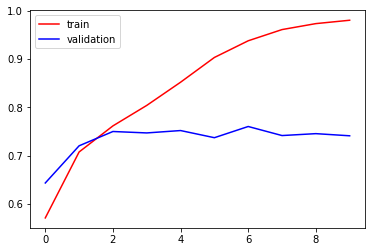

In [14]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [15]:
classes = ['cat', 'dog']

1/1 [==============================] - 0s 32ms/step


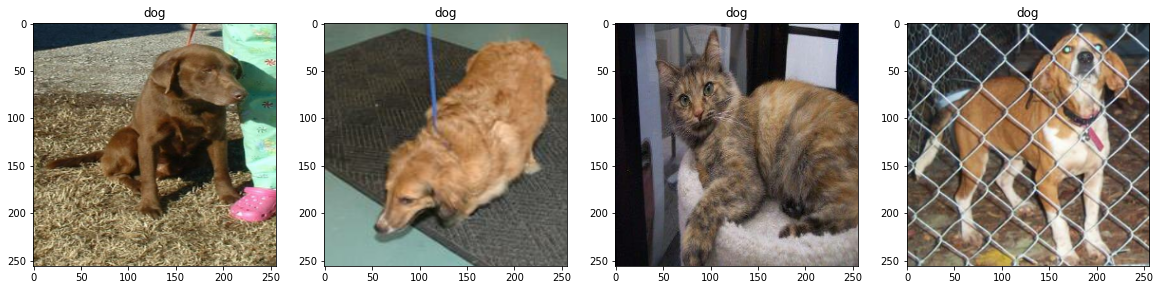

In [29]:
iter = validation.as_numpy_iterator()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index in range(4):
  batch = iter.next()
  ax[index].imshow(np.squeeze(batch[0][index]))
  image = batch[0][index]
  image = tf.image.resize(image, (256, 256))
  image = np.expand_dims(image, axis = 0)
  pred = int(model.predict(image) > 0.5)
  ax[index].title.set_text(classes[pred])

In [17]:
batch = iter.next()
images, labels = batch[0], batch[1]

In [18]:
y_pred = (model.predict(images) > 0.5).astype(int)

1/1 [==============================] - 0s 61ms/step


In [19]:
c_matrix = tf.math.confusion_matrix(labels=labels, predictions = y_pred, num_classes=2)

Text(87.0, 0.5, 'True')

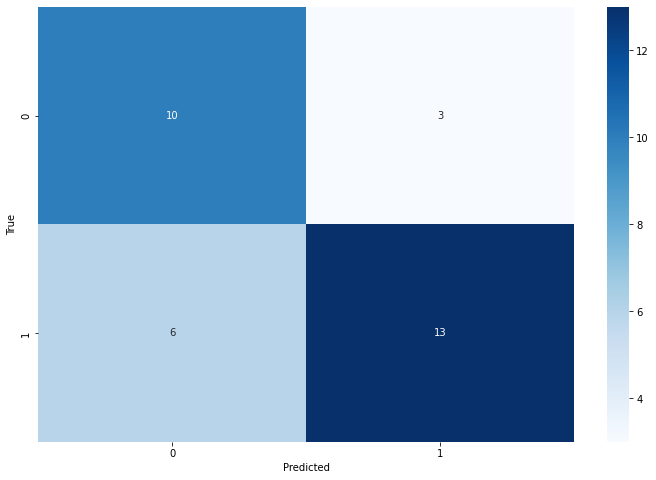

In [20]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

To improve validation accuracy, we will try model training with transfer learning

In [21]:
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (256, 256, 3)
)

In [22]:
transfer_model = tf.keras.Sequential([
    conv_base,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [23]:
transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 23,103,809
Non-trainable params: 0
_________________________________________________________________


In [24]:
conv_base.trainable = False

In [25]:
transfer_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
transfer_history = transfer_model.fit(train, validation_data = validation, epochs = 10)

Epoch 1/10
251/251 [==============================] - 72s 269ms/step - loss: 0.3871 - accuracy: 0.8751 - val_loss: 0.1959 - val_accuracy: 0.9209
Epoch 2/10
251/251 [==============================] - 66s 261ms/step - loss: 0.1173 - accuracy: 0.9528 - val_loss: 0.2383 - val_accuracy: 0.9120
Epoch 3/10
251/251 [==============================] - 66s 262ms/step - loss: 0.0706 - accuracy: 0.9733 - val_loss: 0.1964 - val_accuracy: 0.9293
Epoch 4/10
251/251 [==============================] - 66s 262ms/step - loss: 0.0355 - accuracy: 0.9900 - val_loss: 0.1960 - val_accuracy: 0.9362
Epoch 5/10
251/251 [==============================] - 66s 262ms/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.2174 - val_accuracy: 0.9278
Epoch 6/10
251/251 [==============================] - 66s 262ms/step - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.2883 - val_accuracy: 0.9209
Epoch 7/10
251/251 [==============================] - 66s 263ms/step - loss: 0.0134 - accuracy: 0.9963 - val_loss: 0.3311 - val_ac

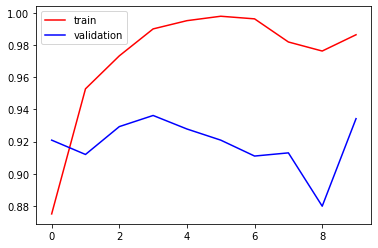

In [28]:
plt.plot(transfer_history.history['accuracy'], color='red', label='train')
plt.plot(transfer_history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()